In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Experimentos
Leemos el dataframe con todos los resultados.

In [2]:
df_resultados = pd.read_csv("resultados_instancias/resultado.csv");
df_resultados

,dataset,metodo,n,m,nist,tiempo
0,angulos_variables,LU,6,10,1,0.003921
1,angulos_variables,LU,8,10,1,0.009416
2,angulos_variables,LU,10,10,1,0.012839
3,angulos_variables,LU,12,10,1,0.020127
4,angulos_variables,LU,14,10,1,0.042560
...,...,...,...,...,...,...
201,gauss-lu,GAUSS,54,54,1,91.205400
202,gauss-lu,LU,56,56,1,113.170000
203,gauss-lu,GAUSS,56,56,1,111.577000
204,gauss-lu,LU,58,58,1,137.524000


## Experimento 1: Análisis de GAUSS vs LU con muchos nist

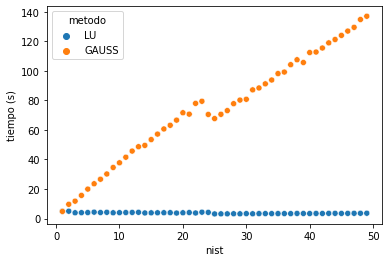

In [3]:
df_muchos_nist = df_resultados[((df_resultados["metodo"]=="GAUSS") | (df_resultados["metodo"]=="LU")) & (df_resultados["dataset"] == "muchos_nist")].copy();
fig = sns.scatterplot(data=df_muchos_nist, x='nist', y='tiempo', hue='metodo');
fig.set(xlabel='nist', ylabel='tiempo (s)');
plt.savefig("graficos/muchos_nist.svg");

## Experimento 2: Análisis de GAUSS vs LU con incrementando n

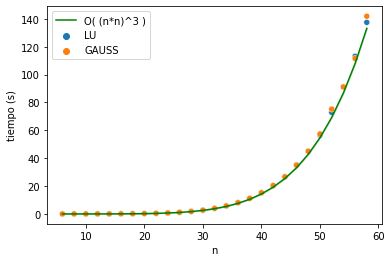

In [4]:
df_gauss_lu = df_resultados[((df_resultados["metodo"]=="GAUSS") | (df_resultados["metodo"]=="LU")) & (df_resultados["dataset"] == "gauss-lu")].copy();
df_gauss_lu["tiempo_esperado"] = (df_gauss_lu["n"] ** 6) * 0.0000000035;
fig = sns.scatterplot(data=df_gauss_lu, x='n', y='tiempo', hue='metodo');
fig = sns.lineplot(data=df_gauss_lu, x='n', y='tiempo_esperado', color="green",label='O( (n*n)^3 )');
fig.set(xlabel='n', ylabel='tiempo (s)');
plt.savefig("graficos/gauss-lu.svg");